In [2]:
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

C:\Users\User\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.25.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


##### Загрузим и подготовим данные для обучения и тестирования

In [3]:
(train_imagesi,train_labels),(test_imagesi,testn_labels)=fashion_mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


In [4]:
train_imagesi = (train_imagesi / 127) - 1
test_imagesi = (test_imagesi / 127) - 1

train_images = train_imagesi.reshape((-1, 784))
test_images = test_imagesi.reshape((-1, 784))

print(train_images.shape)
print(test_images.shape) 

(60000, 784)
(10000, 784)


#### изображение из тренировочного датасета

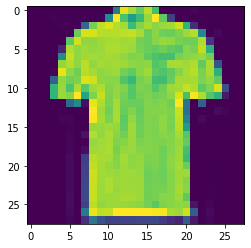

0


In [5]:
n = 25055
plt.imshow(train_imagesi[n,:,:])
plt.show()
print(train_labels[n])

In [6]:
print(np.unique(train_labels))

[0 1 2 3 4 5 6 7 8 9]


In [7]:
y_t = to_categorical(train_labels)
y_tt = to_categorical(testn_labels)

##### Построим и скомпилируем модель

In [8]:
model = Sequential([
  Dense(128, activation='linear', input_shape=(784,)),
  Dense(10, activation='softmax'),# выходной слой из 10 нейронов (сколько классов, столько нейронов) + активация softmax
])

In [9]:
model.compile(
  optimizer='adam',
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


##### тренировка модели

In [11]:
# Train the model. Вернем результаты по потерям и метрикам для всех эпох в hh 
hh = model.fit( 
  train_images,
  y_t,
  epochs=15,
  batch_size=1024, validation_split=0.2
)

# Evaluate the model.
model.evaluate(
  test_images,
  y_tt
)

Epoch 1/15
47/47 [==============================] - 2s 18ms/step - loss: 0.8015 - accuracy: 0.7241 - val_loss: 0.5378 - val_accuracy: 0.8038
Epoch 2/15
47/47 [==============================] - 1s 11ms/step - loss: 0.5027 - accuracy: 0.8244 - val_loss: 0.4847 - val_accuracy: 0.8249
Epoch 3/15
47/47 [==============================] - 1s 12ms/step - loss: 0.4646 - accuracy: 0.8384 - val_loss: 0.4613 - val_accuracy: 0.8385
Epoch 4/15
47/47 [==============================] - 1s 11ms/step - loss: 0.4506 - accuracy: 0.8416 - val_loss: 0.4525 - val_accuracy: 0.8425
Epoch 5/15
47/47 [==============================] - 1s 12ms/step - loss: 0.4384 - accuracy: 0.8463 - val_loss: 0.4524 - val_accuracy: 0.8381
Epoch 6/15
47/47 [==============================] - 1s 12ms/step - loss: 0.4312 - accuracy: 0.8499 - val_loss: 0.4433 - val_accuracy: 0.8440
Epoch 7/15
47/47 [==============================] - 1s 12ms/step - loss: 0.4241 - accuracy: 0.8512 - val_loss: 0.4673 - val_accuracy: 0.8328
Epoch 8/15
47

[0.45473065972328186, 0.8370000123977661]

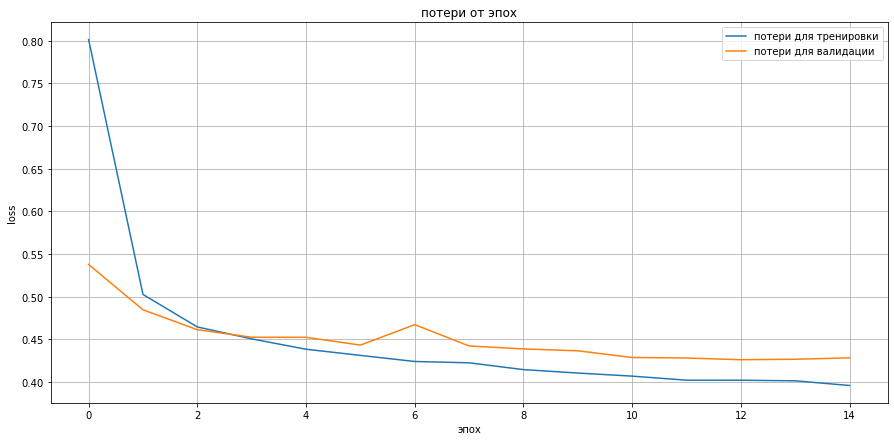

In [12]:
plt.figure(figsize=(15,7))
plt.plot(hh.history['loss'], label = 'потери для тренировки')
plt.plot(hh.history['val_loss'], label = 'потери для валидации')
plt.xlabel('эпох')
plt.ylabel('loss')
plt.legend()
plt.grid('On')
plt.title('потери от эпох')
plt.show()

In [13]:
# Predict on the first 5 test images.
predictions = model.predict(test_images[:5])

# Print our model's predictions.
print(np.argmax(predictions, axis=1))

# Check our predictions against the ground truths.
print(testn_labels[:5]) 

1/1 [==============================] - 0s 105ms/step
[9 2 1 1 6]
[9 2 1 1 6]


#### Построенная модель предсказывает неплохо. Теперь исследуем её оставив те же параметры, но меняя количество нейронов на первом слое.

##### Модель с двумя слоями. Исследование модели с разным количеством нейронов в первом слое.

In [14]:
# количество нейронов для исследования модели
neurons = [32, 64, 128, 256, 512]
epochs = 15

# будем запоминать историю по потерям и метрикам для тренировочного датасета
history_loss = []
history_loss_val = []
history_accuracy = []
history_accuracy_val = []

# будем запоминать окончательное значение потери и метрики для тестового датасета
loss_test = []
accuracy_test = []

for neuron in neurons:
    # строим модель с текущим количеством нейронов
    model = Sequential([
        Dense(neuron, activation='linear', input_shape=(784,)),
        Dense(10, activation='softmax')
    ])
    
    model.compile(
        optimizer='adam',
        loss='categorical_crossentropy',
        metrics=['accuracy'],
    )
    
    #вычислим ошибку и метрику до начала обучения
    hh0_tr = model.evaluate(  train_images[:48000,:], to_categorical(train_labels[:48000]),verbose = 0)
    hh0_val = model.evaluate(  train_images[48000:,:], to_categorical(train_labels[48000:]),verbose = 0)
    
    
    # обучаим модель и запомним историю изменений функций потерь и метрик для тренировочных и валидационных данных
    hh = model.fit( 
        train_images,
        y_t,
        epochs=epochs,
        batch_size=1024, 
        validation_split=0.2,
        verbose = 0
    )
    
    history_loss.append([hh0_tr[0]] + hh.history['loss'])
    history_loss_val.append([hh0_tr[0]] + hh.history['val_loss'])
    history_accuracy.append([hh0_tr[0]] + hh.history['accuracy'])
    history_accuracy_val.append([hh0_tr[0]] + hh.history['val_accuracy'])
    
    #вычислим ошибку и метрику после обучения на тестовых данных
    loss_t, accuracy_t = model.evaluate( test_images, y_tt)
    
    loss_test.append(loss_t)
    accuracy_test.append(accuracy_t)

313/313 [==============================] - 1s 2ms/step - loss: 0.4586 - accuracy: 0.8390


#### Построим график изменений ошибок для кажой модели в зависимости от эпох для тренировочных данных

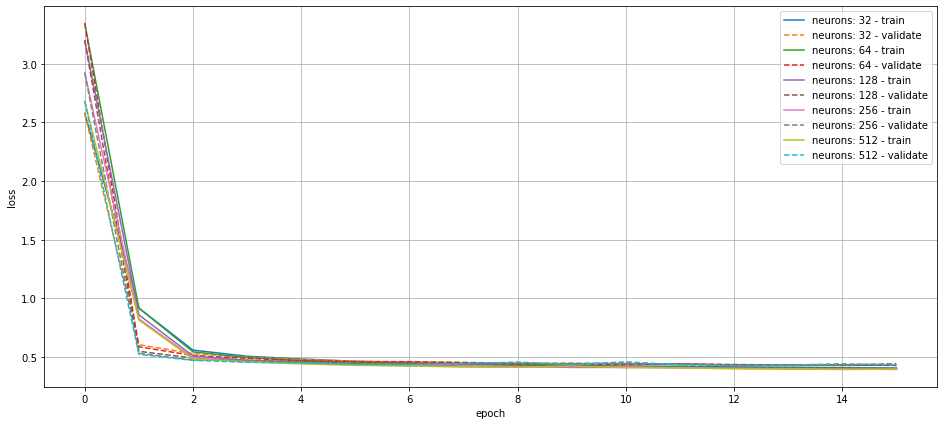

In [15]:
plt.figure(figsize=(16,7))

for index in range(len(neurons)):
    plt.plot(np.arange(epochs+1), history_loss[index],'-',label = f"neurons: {neurons[index]} - train")
    plt.plot(np.arange(epochs+1), history_loss_val[index],'--',label = f"neurons: {neurons[index]} - validate")
    
plt.legend()
plt.grid('On')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

#### По графику видно, что количество нейронов на ошибку особо не повлияло.

####  Построим график изменений метрик для каждой модели от эпох для тренировочных данных.

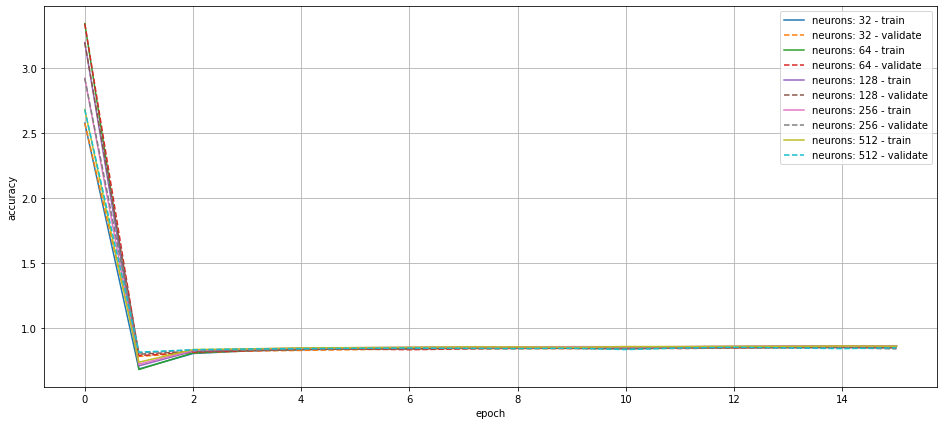

In [16]:
plt.figure(figsize=(16,7))

for index in range(len(neurons)):
    plt.plot(np.arange(epochs+1), history_accuracy[index],'-',label = f"neurons: {neurons[index]} - train")
    plt.plot(np.arange(epochs+1), history_accuracy_val[index],'--',label = f"neurons: {neurons[index]} - validate")
    
plt.legend()
plt.grid('On')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

#### Аналогичная картина и с метриками.

#### Посмотрим на итоговые ошибки и метрики с тестовыми данными.

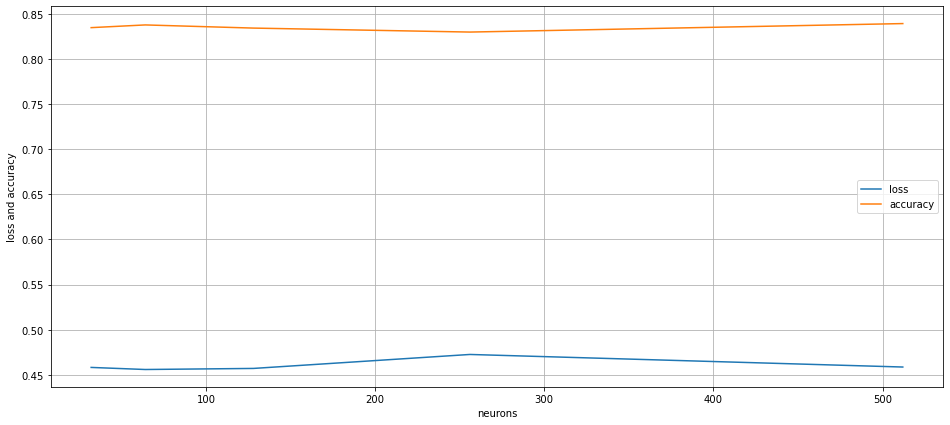

In [17]:
plt.figure(figsize=(16,7))

plt.plot(neurons, loss_test,'-',label = "loss")
plt.plot(neurons, accuracy_test,'-',label = "accuracy")
    
plt.legend()
plt.grid('On')
plt.xlabel('neurons')
plt.ylabel('loss and accuracy')
plt.show()

#### На минимальном количестве нейронов модель показывала себя хорошо, потом немного просела и вернулась к тому что было в начале особо не изменяясь.

### Вывод исследования: количество нейронов особо не влияет на качество, если в сети всего два слоя.

##### Исследование модели при разном количестве скрытых слоёв.

##### Первый слой оставим такой же как в предыдущем исследовании с количеством нейронов 128 (он показал себя лучше всех), а скрытые слои будут иметь каждый по 64 нейрона и активационную функцию relu, выходной слой тоже будет какой был.

In [18]:
# количество слоев для исследования модели
layers = [1, 2, 3, 5, 10]

epochs = 15

# будем запоминать историю по потерям и метрикам для тренировочного датасета
history_loss = []
history_loss_val = []
history_accuracy = []
history_accuracy_val = []

# будем запоминать окончательное значение потери и метрики для тестового датасета
loss_test = []
accuracy_test = []

for layer in layers:
    model = Sequential(name='test_model')
    model.add( Dense( 128, activation='linear', input_shape=(784,))) 
    
    for index in range(layer):
        model.add( Dense( 64, activation='relu')) 
    
    model.add( Dense( 10, activation='softmax'))
    
    model.compile(
        optimizer='adam',
        loss='categorical_crossentropy',
        metrics=['accuracy'],
    )
    
    # вычислим ошибку и метрику до начала обучения
    hh0_tr = model.evaluate(  train_images[:48000,:], to_categorical(train_labels[:48000]),verbose = 0)
    hh0_val = model.evaluate(  train_images[48000:,:], to_categorical(train_labels[48000:]),verbose = 0)
    
    
    # обучаем модель и запоминаем историю изминений функций потерь и метрик для тренировочных и валидационных данных
    hh = model.fit( 
        train_images,
        y_t,
        epochs=epochs,
        batch_size=1024, 
        validation_split=0.2,
        verbose = 0
    )
    
    history_loss.append([hh0_tr[0]] + hh.history['loss'])
    history_loss_val.append([hh0_tr[0]] + hh.history['val_loss'])
    history_accuracy.append([hh0_tr[0]] + hh.history['accuracy'])
    history_accuracy_val.append([hh0_tr[0]] + hh.history['val_accuracy'])
    
    # вычислим ошибку и метрику после обучения на тестовых данных
    loss_t, accuracy_t = model.evaluate( test_images, y_tt)
    
    loss_test.append(loss_t)
    accuracy_test.append(accuracy_t)

313/313 [==============================] - 1s 2ms/step - loss: 0.3858 - accuracy: 0.8639


#### Построим график изменений ошибок для каждой модели в зависимости от эпох для тренировочных данных.

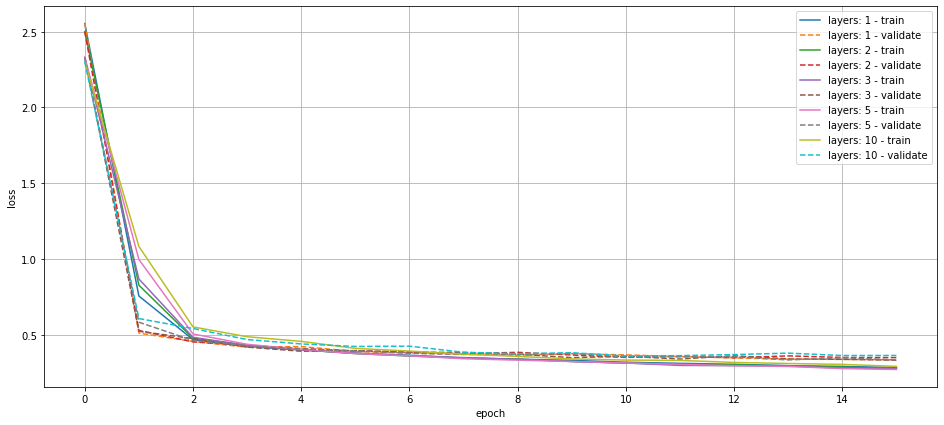

In [19]:
plt.figure(figsize=(16,7))

for index in range(len(layers)):
    plt.plot(np.arange(epochs+1), history_loss[index],'-',label = f"layers: {layers[index]} - train")
    plt.plot(np.arange(epochs+1), history_loss_val[index],'--',label = f"layers: {layers[index]} - validate")
    
plt.legend()
plt.grid('On')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

#### Количество слоев несильно влияет на результат обучения при текущих настройках.

#### Построим график изменений метрик для каждой модели от эпох для тренировочных данных.

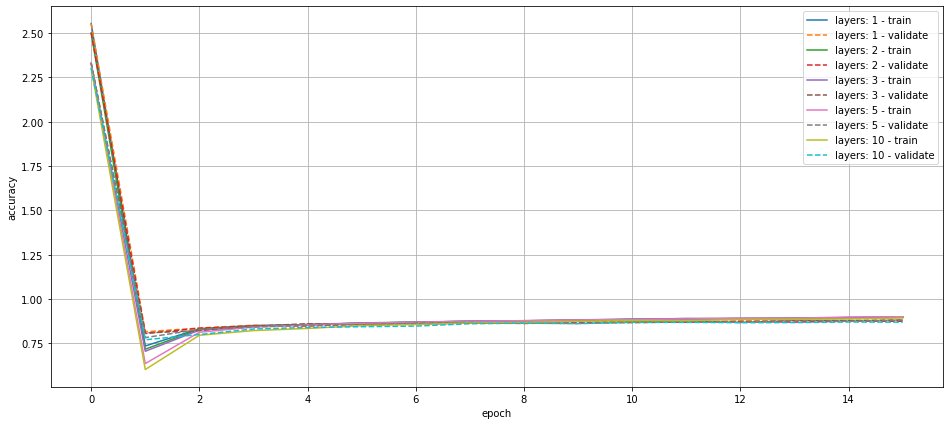

In [20]:
plt.figure(figsize=(16,7))

for index in range(len(layers)):
    plt.plot(np.arange(epochs+1), history_accuracy[index],'-',label = f"layers: {layers[index]} - train")
    plt.plot(np.arange(epochs+1), history_accuracy_val[index],'--',label = f"layers: {layers[index]} - validate")
    
plt.legend()
plt.grid('On')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

#### Аналогичная картина и на метриках.

#### Посмотрим на итоговые ошибки и метрики с тестовыми данными.

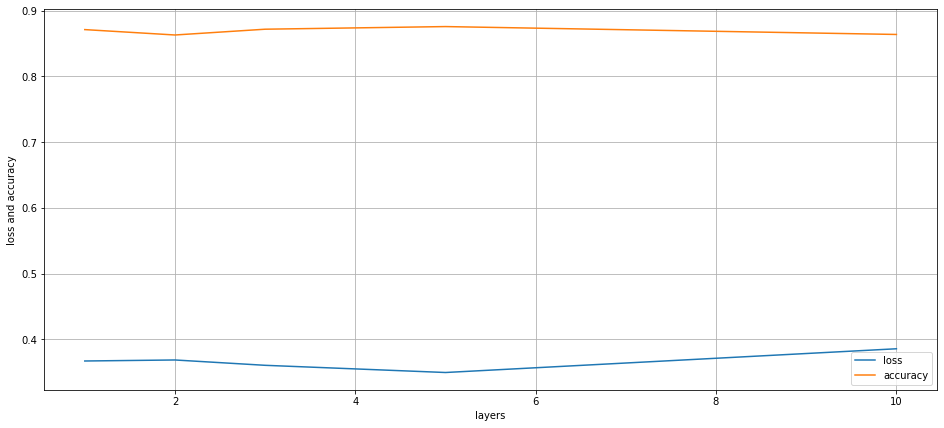

In [21]:
plt.figure(figsize=(16,7))

plt.plot(layers, loss_test,'-',label = "loss")
plt.plot(layers, accuracy_test,'-',label = "accuracy")
    
plt.legend()
plt.grid('On')
plt.xlabel('layers')
plt.ylabel('loss and accuracy')
plt.show()

#### Лучше всего модель проявила себя на 2 и 3 скрытых слоях.

#### Исследование поведения модели с разными оптимизаторами.

#### Исследовать будем сеть из одного линейного входа, двух скрытых слоев (relu) и одного выходного (softmax).
#### Для каждой итерации исследования на вход будем подавать один и тот же набор входных весов.

In [22]:
# оптимизаторы для исследования
optimazers = ['SGD','RMSProp','adam','NAdam']

# создаем модель model для генерации входных весов
model_test = Sequential([
    Dense( 128, activation='linear', input_shape=(784,)),
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax'),
])
# сохраняем ее веса (это начальная точка) model.save_weights('model.h5')
model_test.save_weights('model.h5')

# число рабочих эпох
epochs = 15

# будем запоминать историю по потерям и метрикам для тренировочного датасета
history_loss = []
history_loss_val = []
history_accuracy = []
history_accuracy_val = []

# будем запоминать окончательное значение потери и метрики для тестового датасета
loss_test = []
accuracy_test = []

for optimazer in optimazers:
    model = Sequential([
        Dense( 128, activation='linear', input_shape=(784,)),
        Dense(64, activation='relu'),
        Dense(64, activation='relu'),
        Dense(10, activation='softmax'),
    ])
    
    # загружаем веса 
    model.load_weights('model.h5')
    
    model.compile(
        optimizer=optimazer,
        loss='categorical_crossentropy',
        metrics=['accuracy'],
    )
    
    # вычислим ошибку и метрику до начала обучения
    hh0_tr = model.evaluate(  train_images[:48000,:], to_categorical(train_labels[:48000]),verbose = 0)
    hh0_val = model.evaluate(  train_images[48000:,:], to_categorical(train_labels[48000:]),verbose = 0)
    
    
    # обучаем модель и запоминаем историю изминений функций потерь и метрик для тренировочных и валидационных данных
    hh = model.fit( 
        train_images,
        y_t,
        epochs=epochs,
        batch_size=1024, 
        validation_split=0.2,
        verbose = 0
    )
    
    history_loss.append([hh0_tr[0]] + hh.history['loss'])
    history_loss_val.append([hh0_tr[0]] + hh.history['val_loss'])
    history_accuracy.append([hh0_tr[0]] + hh.history['accuracy'])
    history_accuracy_val.append([hh0_tr[0]] + hh.history['val_accuracy'])
    
    # вычислим ошибку и метрику после обучения на тестовых данных
    loss_t, accuracy_t = model.evaluate( test_images, y_tt)
    
    loss_test.append(loss_t)
    accuracy_test.append(accuracy_t)

313/313 [==============================] - 1s 2ms/step - loss: 0.3554 - accuracy: 0.8728


#### Построим график изменений ошибок для каждой модели в зависимости от эпох для тренировочных данных.

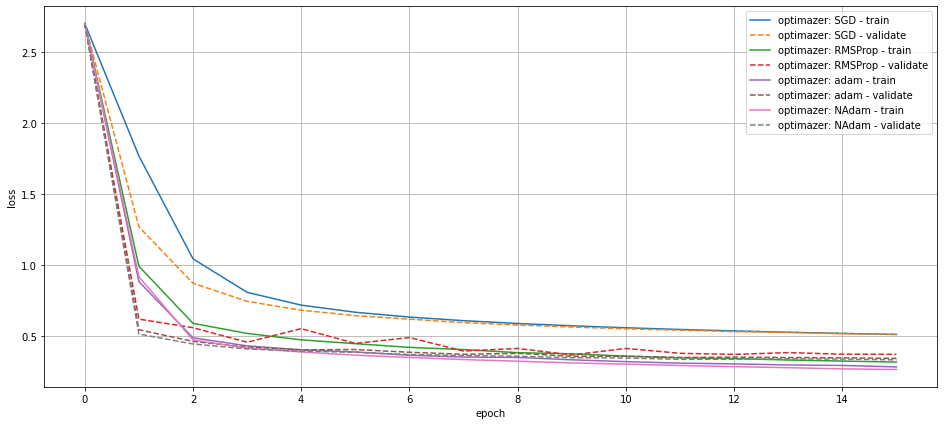

In [23]:
plt.figure(figsize=(16,7))

for index in range(len(optimazers)):
    plt.plot(np.arange(epochs+1), history_loss[index],'-',label = f"optimazer: {optimazers[index]} - train")
    plt.plot(np.arange(epochs+1), history_loss_val[index],'--',label = f"optimazer: {optimazers[index]} - validate")
    
plt.legend()
plt.grid('On')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

#### Оптимизаторы показали более раличные варианты на ошибке.

#### Теперь посмотрим их поведение на метриках.

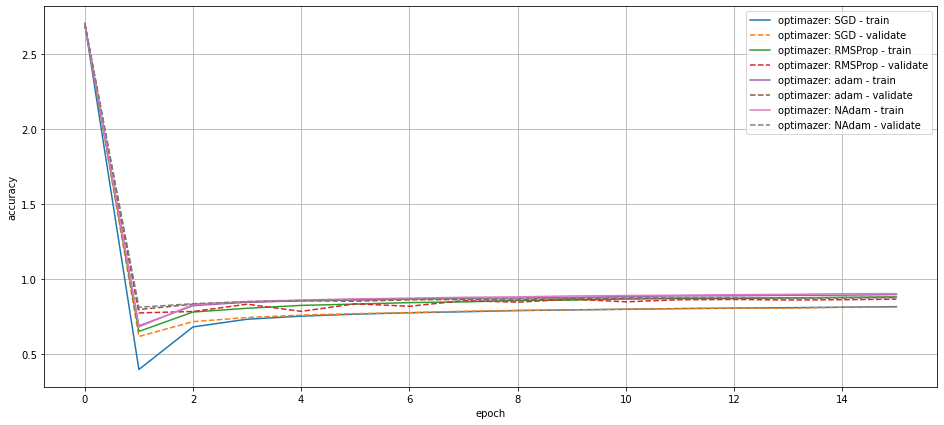

In [24]:
plt.figure(figsize=(16,7))

for index in range(len(optimazers)):
    plt.plot(np.arange(epochs+1), history_accuracy[index],'-',label = f"optimazer: {optimazers[index]} - train")
    plt.plot(np.arange(epochs+1), history_accuracy_val[index],'--',label = f"optimazer: {optimazers[index]} - validate")
    
plt.legend()
plt.grid('On')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

#### На метриках видна разница между оптимизаторами.

#### Посмотрим на итоговые значения на тестовых данных.

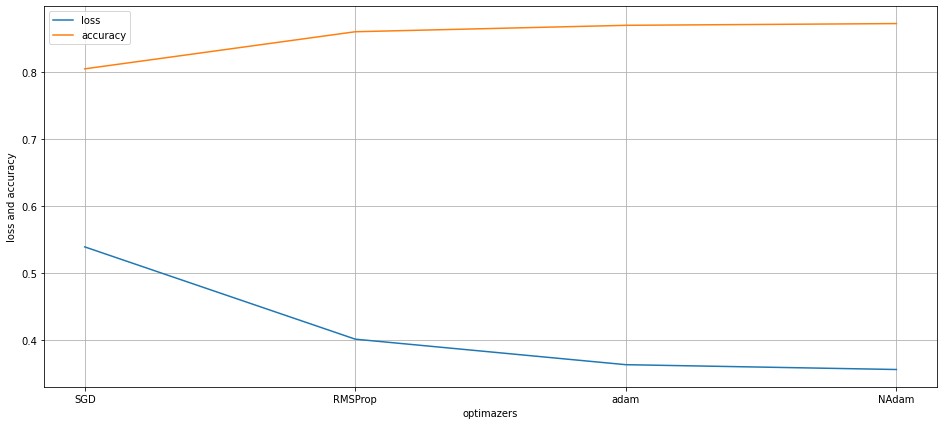

In [25]:
plt.figure(figsize=(16,7))

plt.plot(optimazers, loss_test,'-',label = "loss")
plt.plot(optimazers, accuracy_test,'-',label = "accuracy")
    
plt.legend()
plt.grid('On')
plt.xlabel('optimazers')
plt.ylabel('loss and accuracy')
plt.show()

#### Лучше всего  сеть повела себя на оптимизаторах adam и NAdam.

#### Обобщая три исследования, при тех настройках сети, что были выбраны, большее влияние оказали оптимизаторы.

#### Построим матрицу ошибок и оценим каждый класс.

#### Оценивать будем модель из предыдущего исследования с метрикой NAdam.

In [26]:
from sklearn.metrics import confusion_matrix

In [27]:
y_pred = np.argmax(model.predict(test_images), axis=1)

313/313 [==============================] - 1s 2ms/step


In [28]:
confusion_matrix(testn_labels,y_pred)

array([[850,   0,  22,  21,   3,   4,  90,   0,  10,   0],
       [  5, 965,   2,  20,   2,   1,   3,   0,   2,   0],
       [ 15,   2, 810,  14,  87,   2,  68,   0,   2,   0],
       [ 36,   9,  16, 874,  35,   1,  24,   0,   5,   0],
       [  0,   2, 103,  27, 808,   0,  56,   0,   4,   0],
       [  0,   0,   0,   1,   0, 937,   0,  30,   2,  30],
       [154,   2, 108,  27,  62,   0, 624,   0,  23,   0],
       [  0,   0,   0,   0,   0,  30,   0, 937,   1,  32],
       [  7,   0,   3,   2,   3,   6,  10,   6, 963,   0],
       [  0,   0,   0,   0,   0,   7,   0,  33,   0, 960]], dtype=int64)

#### Из матрицы видно, что хуже всех предсказываются классы 4 и 6, для них можно делать отдельные сети для обчуения, чтобы повысить точность.